###L2 Regularization(Ridge Regresison)

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [41]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [42]:
df = housing

In [43]:
df = pd.DataFrame(df.data)

In [44]:
df

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [45]:
df.columns = housing.feature_names

In [46]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [47]:
x = df
y = housing.target

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [49]:
x_train.shape

(14448, 8)

In [50]:
x_test.shape

(6192, 8)

In [51]:
y_train.shape

(14448,)

In [52]:
y_test.shape

(6192,)

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [55]:
x_train

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
         0.99235014, -1.41592345]])

In [56]:
x_test

array([[-1.15209909, -0.30267793, -0.48206459, ...,  0.60588341,
         0.22100564,  0.26245997],
       [-0.70179147,  0.09672999, -0.14607585, ..., -0.1827281 ,
        -0.20974655,  0.0379687 ],
       [-0.19920134,  1.85412486, -0.56735074, ..., -1.051554  ,
         1.03568912, -1.44866235],
       ...,
       [-0.18230355, -1.02161219, -0.65256612, ..., -0.3870047 ,
        -0.89801363,  0.8112164 ],
       [-0.10920338, -1.5009017 ,  0.03743213, ...,  0.38864246,
         1.0450533 , -0.86997375],
       [-0.42597077, -0.94173061, -0.81378442, ..., -0.22539751,
        -0.67327336,  0.64658947]])

In [57]:
#if want to inverse from scalling to back
#x_train =scaler.inverse_transform(x_train)

In [58]:
from sklearn.linear_model import Ridge,Lasso
lasso_reg = Lasso(alpha = .001)

In [59]:
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.001)

In [60]:
from sklearn.model_selection import cross_val_score
mse = cross_val_score(lasso_reg,x_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [61]:
np.mean(mse)

-0.5256703788822217

In [62]:
lasso_reg_pred = lasso_reg.predict(x_test)

In [63]:
lasso_reg_pred

array([0.70787385, 1.7538176 , 2.71921495, ..., 2.07862449, 1.5681599 ,
       1.82967967])

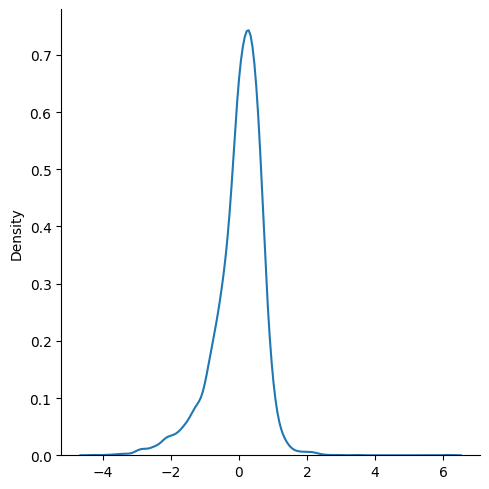

In [64]:
sns.displot(lasso_reg_pred-y_test, kind= 'kde')

The above grapgh shows that the difference between them is in between 2 and -2 which is very negligible in regression case.

In [65]:
#Accuracy and Quality of training
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,lasso_reg_pred)

In [66]:
r2_score

0.6065651578999236